96732238800.35297
94112406641.67743
75874846680.09286


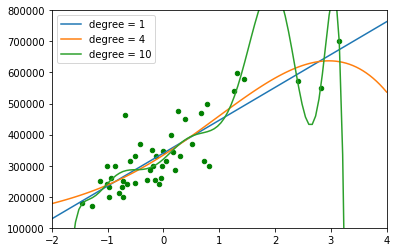

In [10]:
#import…as是一种导入库的方法
import numpy as np
import matplotlib.pyplot as plt
# 定义存储输入数据x和目标数据y的数组
x, y = [], []
#遍历数据集，变量sample对应的是一个个样本，括号里为文件路径
for sample in open("D:\Pictures\prices.txt", "r"):
#采用python的split方法，具体方法参考网址https://www.runoob.com/python/att-string-split.html?ivk_sa=1023345p，split(",")这里是以逗号作为分隔符，将参数分别传给xx和yy。
    xx, yy = sample.split(",")
#用float()将字符串数据浮点化，其中append()方法用于在列表末尾添加新的对象，这里添加到输入数据x和目标数据y的数组后面。
    x.append(float(xx))
    y.append(float(yy))
#np.array与np.asarray功能是一样的，都是将输入转为矩阵格式，具体参考https://www.runoob.com/numpy/numpy-ndarray-object.html
x, y = np.array(x), np.array(y)
# 数据标准化
x = (x - x.mean()) / x.std()
# 将原始数据以散点图的形式画出


#在（-2，4）这个区间里取100个点作为画图的基础
x0 = np.linspace(-2, 4, 100)
# def 定义函数get_model，deg为参数，即x的最高次幂
def get_model(deg):
#这里用到np.polyfit()函数，是进行多项式拟合，求出求取一组p0-pn,使得loss，即损失函数的值最小。详情可参考网址https://www.cnblogs.com/maplethefox/p/11468296.html，根据拟合系数（即p0-pn）与自变量x求出拟合值,采用np.polyval()函数。接着返回的模型能够根据输入的x（默认是x0），返回相对应的预测的y。
    return lambda input_x=x0: np.polyval(np.polyfit(x, y, deg), input_x)
# 定义损失函数
def get_cost(deg, input_x, input_y):
    return 0.5 * ((get_model(deg)(input_x) - input_y) ** 2).sum()
#计算采用get_model 模型处理输入input_x得到的预测结果，与真实结果input_y，损失函数结果。
# 定义测试集
test_set = (1, 4, 10)
for d in test_set:
    print(get_cost(d, x, y))
# 画出相应的图像
plt.scatter(x, y, c="g", s=20)
for d in test_set:
    plt.plot(x0, get_model(d)(), label="degree = {}".format(d))
#用plt.plot绘制折线图
#将横轴、纵轴的范围分别限制在（-2，4）、（1e5, 8e5）
plt.xlim(-2, 4)
plt.ylim(1e5, 8e5)
#调用legend方法使得曲线显示对应的label
plt.legend()
plt.show()



In [8]:
#import…as是一种导入库的方法
import numpy as np
# 定义存储输入数据x和目标数据y的数组
x, y = [], []
for sample in open("D:\Pictures\prices.txt", "r"):
    x.append([float(sample.split(",")[0]),float(sample.split(",")[1])])
    y.append(float(sample.split(",")[2]))
x, y = np.array(x), np.array(y)


# sigmoid激活函数定义
def sigmoid(x):
	return 1 / (1 + np.exp(-x))

# 定义损失函数
def get_cost(input_x, input_y):
    return 0.5 * ((input_x - input_y) ** 2)
#计算采用get_model 模型处理输入input_x得到的预测结果，与真实结果input_y，损失函数结果。

class NeuralNetwork():       
    def __init__(self):
        
        self.w1 = np.random.normal()
        self.w2 = np.random.normal()
        self.w3 = np.random.normal()
        self.w4 = np.random.normal()
        self.w5 = np.random.normal()
        self.w6 = np.random.normal()
        self.b1 = np.random.normal()
        self.b2 = np.random.normal()
        self.b3 = np.random.normal()
        
    def forward(self,x):
        outh1=sigmoid(self.w1 * x[0] + self.w2 * x[1] +self.b1)
        outh2=sigmoid(self.w3 * x[0] + self.w4 * x[1] +self.b2)
        outh3=sigmoid(self.w5 * outh1 + self.w6 * outh2 + self.b3)
        return outh3
    
    def train(self, data, y):
        learn_rate = 0.1
        epochs = 100 # number of times to loop through the entire dataset
        for epoch in range(epochs):
            for x, y_trues in zip(data, y):
               
                # 神经网络的前向（前馈）计算
                h1 = self.w1 * x[0] + self.w2 * x[1] +self.b1
                h2 = self.w3 * x[0] + self.w4 * x[1] +self.b2
                outh1=sigmoid(h1)
                outh2=sigmoid(h2)
                h3 = self.w5 * outh1 + self.w6 * outh2 +self.b3
                outh3=sigmoid(h3)
                
                #梯度计算式子
                d_E_outh3= (outh3 - y_trues)
                d_outh3_h3= outh3 * (1-outh3)
                d_outh1_h1= outh1 * (1-outh1)
                d_outh2_h2= outh2 * (1-outh2)
               
                #反向传播，调整权值
                self.w5 -=learn_rate *d_E_outh3*d_outh3_h3*outh1
                self.w6 -=learn_rate *d_E_outh3*d_outh3_h3*outh2
                self.b3 -=learn_rate *d_E_outh3*d_outh3_h3

                self.w1 -=learn_rate *d_E_outh3*d_outh3_h3*self.w5 * d_outh1_h1 * x[0]
                self.w2 -=learn_rate *d_E_outh3*d_outh3_h3*self.w5 * d_outh1_h1 * x[1]
                self.b1 -=learn_rate *d_E_outh3*d_outh3_h3*self.w5 * d_outh1_h1
                self.w3 -=learn_rate *d_E_outh3*d_outh3_h3*self.w6 * d_outh2_h2 * x[0]
                self.w4 -=learn_rate *d_E_outh3*d_outh3_h3*self.w6 * d_outh2_h2 * x[1]
                self.b2 -=learn_rate *d_E_outh3*d_outh3_h3*self.w6 * d_outh2_h2
            
            if epoch % 10 == 0:
                loss = 0
                for i, yy in zip(data, y):
                    y_preds = self.forward(i)
                    loss+= get_cost(y_preds,yy)
                print("Epoch %d loss: %.3f", (epoch, loss))

network = NeuralNetwork()
network.train(x, y)






IndexError: list index out of range

In [4]:
from math import log
import operator

def calcShannonEnt(dataSet):  # 计算数据的熵(entropy)
    numEntries=len(dataSet)  # 数据条数
    labelCounts={}
    for featVec in dataSet:
        currentLabel=featVec[-1] # 每行数据的最后一个字（类别）
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel]=0
        labelCounts[currentLabel]+=1  # 统计有多少个类以及每个类的数量
    shannonEnt=0
    for key in labelCounts:
        prob=float(labelCounts[key])/numEntries # 计算单个类的熵值
        shannonEnt-=prob*log(prob,2) # 累加每个类的熵值
    return shannonEnt

def createDataSet1():    # 创造示例数据
    dataSet = [['长', '粗', '男'],
               ['短', '粗', '男'],
               ['短', '粗', '男'],
               ['长', '细', '女'],
               ['短', '细', '女'],
               ['短', '粗', '女'],
               ['长', '粗', '女'],
               ['长', '粗', '女']]
    labels = ['头发','声音']  #两个特征
    return dataSet,labels

def splitDataSet(dataSet,axis,value): # 按某个特征分类后的数据
    retDataSet=[]
    for featVec in dataSet:
        if featVec[axis]==value:
            reducedFeatVec =featVec[:axis]
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)
    return retDataSet

def chooseBestFeatureToSplit(dataSet):  # 选择最优的分类特征
    numFeatures = len(dataSet[0])-1
    baseEntropy = calcShannonEnt(dataSet)  # 原始的熵
    bestInfoGain = 0
    bestFeature = -1
    for i in range(numFeatures):
        featList = [example[i] for example in dataSet]
        uniqueVals = set(featList)
        newEntropy = 0
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet,i,value)
            prob =len(subDataSet)/float(len(dataSet))
            newEntropy +=prob*calcShannonEnt(subDataSet)  # 按特征分类后的熵
        infoGain = baseEntropy - newEntropy  # 原始熵与按特征分类后的熵的差值
        if (infoGain>bestInfoGain):   # 若按某特征划分后，熵值减少的最大，则次特征为最优分类特征
            bestInfoGain=infoGain
            bestFeature = i
    return bestFeature

def majorityCnt(classList):    #按分类后类别数量排序，比如：最后分类为2男1女，则判定为男；
    classCount={}
    for vote in classList:
        if vote not in classCount.keys():
            classCount[vote]=0
        classCount[vote]+=1
    sortedClassCount = sorted(classCount.items(),key=operator.itemgetter(1),reverse=True)
    return sortedClassCount[0][0]

def createTree(dataSet,labels):
    classList=[example[-1] for example in dataSet]  # 类别：男或女
    if classList.count(classList[0])==len(classList): # 如果类别完全相同就停止划分
        return classList[0]
    if len(dataSet[0])==1:
        return majorityCnt(classList)
    bestFeat=chooseBestFeatureToSplit(dataSet) #选择最优特征
    bestFeatLabel=labels[bestFeat]
    myTree={bestFeatLabel:{}} #分类结果以字典形式保存
    del(labels[bestFeat])
    featValues=[example[bestFeat] for example in dataSet]
    uniqueVals=set(featValues)
    for value in uniqueVals:
        subLabels=labels[:]
        myTree[bestFeatLabel][value]=createTree(splitDataSet\
                          (dataSet,bestFeat,value),subLabels)
    return myTree


if __name__=='__main__':
    dataSet, labels=createDataSet1()  # 创造示列数据
    print(createTree(dataSet, labels))  # 输出决策树模型结果


{'声音': {'细': '女', '粗': {'头发': {'短': '男', '长': '女'}}}}


In [7]:
from math import log
import operator
import csv
def calcShannonEnt(dataSet):  # 计算数据的熵(entropy)
    numEntries=len(dataSet)  # 数据条数
    labelCounts={}
    for featVec in dataSet:
        currentLabel=featVec[-1] # 每行数据的最后一个字（类别）
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel]=0
        labelCounts[currentLabel]+=1  # 统计有多少个类以及每个类的数量
    shannonEnt=0
    for key in labelCounts:
        prob=float(labelCounts[key])/numEntries # 计算单个类的熵值
        shannonEnt-=prob*log(prob,2) # 累加每个类的熵值
    return shannonEnt

def createDataSet1():    # 创造示例数据
    dataSet = list()
    f=open(r'D:\Pictures\xigua.csv') 
    reader = csv.reader(f)
    label = next(reader)
    labels = label[:-1]
    lines=f.readlines()
    for line in lines:
        elements = line.strip().split(',') 
        dataSet.append(elements)
    return dataSet,labels

def splitDataSet(dataSet,axis,value): # 按某个特征分类后的数据
    retDataSet=[]
    for featVec in dataSet:
        if featVec[axis]==value:
            reducedFeatVec =featVec[:axis]
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)
    return retDataSet

def chooseBestFeatureToSplit(dataSet):  # 选择最优的分类特征
    numFeatures = len(dataSet[0])-1
    baseEntropy = calcShannonEnt(dataSet)  # 原始的熵
    bestInfoGain = 0
    bestFeature = -1
    for i in range(numFeatures):
        featList = [example[i] for example in dataSet]
        uniqueVals = set(featList)
        newEntropy = 0
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet,i,value)
            prob =len(subDataSet)/float(len(dataSet))
            newEntropy +=prob*calcShannonEnt(subDataSet)  # 按特征分类后的熵
        infoGain = baseEntropy - newEntropy  # 原始熵与按特征分类后的熵的差值
        if (infoGain>bestInfoGain):   # 若按某特征划分后，熵值减少的最大，则次特征为最优分类特征
            bestInfoGain=infoGain
            bestFeature = i
    return bestFeature

def majorityCnt(classList):    #按分类后类别数量排序，比如：最后分类为2男1女，则判定为男；
    classCount={}
    for vote in classList:
        if vote not in classCount.keys():
            classCount[vote]=0
        classCount[vote]+=1
    sortedClassCount = sorted(classCount.items(),key=operator.itemgetter(1),reverse=True)
    return sortedClassCount[0][0]

def createTree(dataSet,labels):
    classList=[example[-1] for example in dataSet]  # 类别：男或女
    if classList.count(classList[0])==len(classList): # 如果类别完全相同就停止划分
        return classList[0]
    if len(dataSet[0])==1:
        return majorityCnt(classList)
    bestFeat=chooseBestFeatureToSplit(dataSet) #选择最优特征
    bestFeatLabel=labels[bestFeat]
    myTree={bestFeatLabel:{}} #分类结果以字典形式保存
    del(labels[bestFeat])
    featValues=[example[bestFeat] for example in dataSet]
    uniqueVals=set(featValues)
    for value in uniqueVals:
        subLabels=labels[:]
        myTree[bestFeatLabel][value]=createTree(splitDataSet\
                          (dataSet,bestFeat,value),subLabels)
    return myTree


if __name__=='__main__':
    dataSet, labels=createDataSet1()  # 创造示列数据
    print(createTree(dataSet, labels))  # 输出决策树模型结果


{'纹理': {'稍糊': {'触感': {'硬滑': '否', '软粘': '是'}}, '清晰': {'根蒂': {'蜷缩': '是', '硬挺 ': '否', '稍蜷 ': '是', '蜷缩 ': '是', '稍蜷': {'触感': {'硬滑': '是', '软粘': '否'}}}}, '模糊': '否'}}
